In [1]:
import lasio
from pandas import *
from scipy import *
from numpy import *
from matplotlib.pyplot import *

In [2]:
#Lets import the data using the link below
las = lasio.read(r'C:\Users\akabanda\Desktop\ANACONDA_\COMPUTATIONAL GEOPHYSICS\BU.LAS')
#to view header we can use the below command
#las.header
#to view the type of data
#type(las.data)

Header section Parameter regexp=~P was not found.


In [4]:
for curve in las.curves:
    print(curve.mnemonic)
    print(curve.unit)
    print(curve.data)
    print('\n\n')

DEPTH
FT
[  90.    90.5   91.  ... 8788.5 8789.  8789.5]



CALI
IN
[nan nan nan ... nan nan nan]



DTCORRFINAL
US/FT
[nan nan nan ... nan nan nan]



DTSCORRFINAL
US/FT
[nan nan nan ... nan nan nan]



GR
API
[23.0401 25.1091 22.1577 ...     nan     nan     nan]



NPHI
V/V
[nan nan nan ... nan nan nan]



PHIE

[nan nan nan ... nan nan nan]



RHOBCORRFINAL
G/CM3
[    nan     nan     nan ... 2.70557 2.70497 2.70592]



SW
V/V
[nan nan nan ... nan nan nan]



SWQ
FRAC
[nan nan nan ... nan nan nan]



SXO
V/V
[nan nan nan ... nan nan nan]



SXOQ:1
FRAC
[nan nan nan ... nan nan nan]



SXOQ:2

[nan nan nan ... nan nan nan]



VCL
V/V
[nan nan nan ... nan nan nan]



VDOL
V/V
[nan nan nan ... nan nan nan]



VLIM
V/V
[nan nan nan ... nan nan nan]





<IPython.core.display.Javascript object>


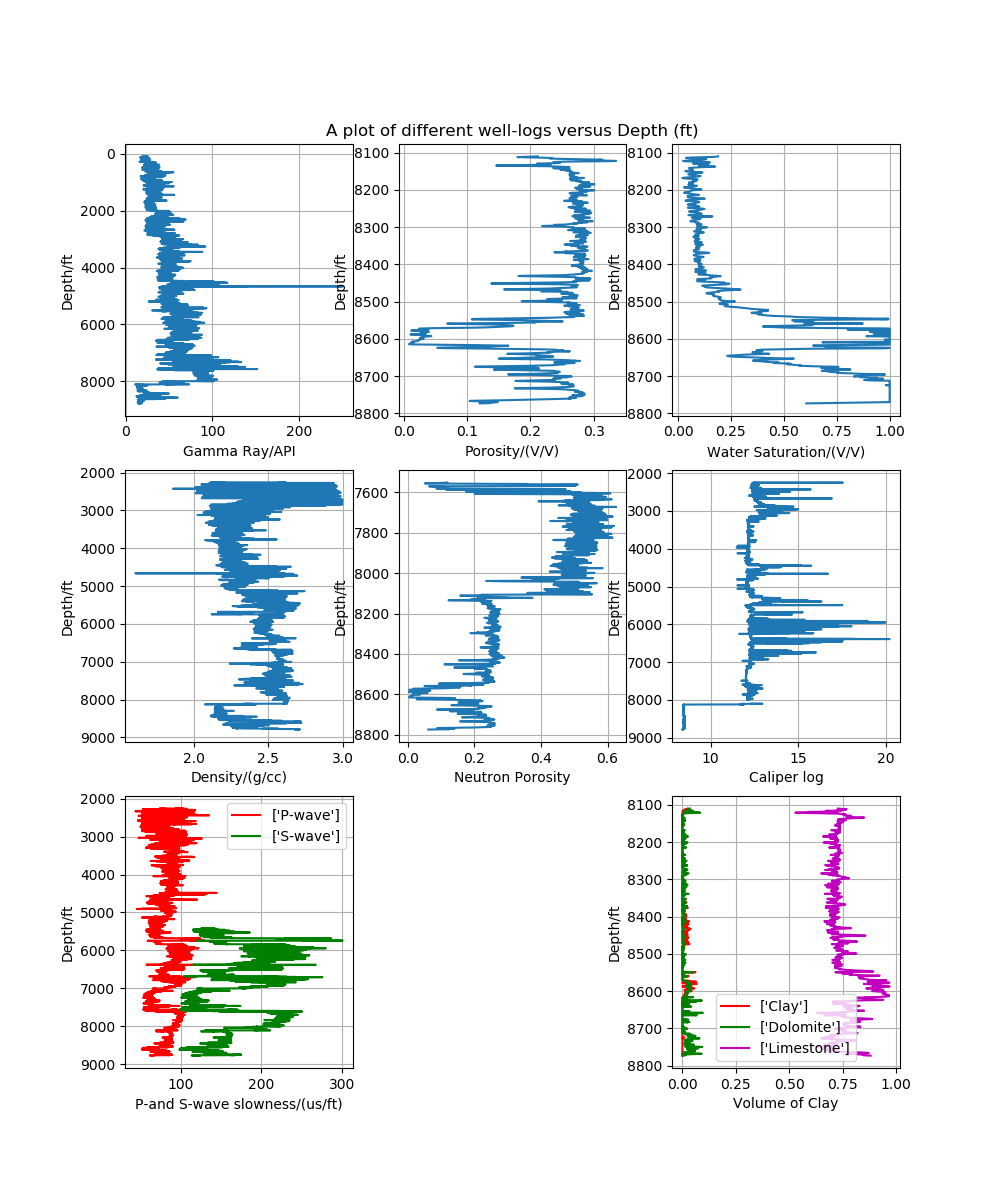

In [22]:
#There are 16 curves but we will just view the most important ones and later concentrate in the zone of interest from 8000-9000 ft
%matplotlib notebook
figure(figsize=(10,12))
subplot(3,3,1)
plot(las['GR'],las['DEPTH'])
gca().invert_yaxis()
xlabel('Gamma Ray/API')
ylabel('Depth/ft')
grid()

subplot(3,3,2)
plot(las['PHIE'],las['DEPTH'])
gca().invert_yaxis()
xlabel('Porosity/(V/V)')
ylabel('Depth/ft')
title('A plot of different well-logs versus Depth (ft)')
grid()

subplot(3,3,3)
plot(las['SW'],las['DEPTH'])
gca().invert_yaxis()
xlabel('Water Saturation/(V/V)')
ylabel('Depth/ft')
grid()

subplot(3,3,4)
plot(las['RHOBCORRFINAL'],las['DEPTH'])
gca().invert_yaxis()
xlabel('Density/(g/cc)')
ylabel('Depth/ft')
grid()

subplot(3,3,5)
plot(las['NPHI'],las['DEPTH'])
gca().invert_yaxis()
xlabel('Neutron Porosity')
ylabel('Depth/ft')
grid()

subplot(3,3,6)
plot(las['CALI'],las['DEPTH'])
gca().invert_yaxis()
xlabel('Caliper log')
ylabel('Depth/ft')
grid()

subplot(3,3,7)
plot(las['DTCORRFINAL'],las['DEPTH'], 'r', las['DTSCORRFINAL'],las['DEPTH'],'g')
gca().invert_yaxis()
legend([['P-wave'],['S-wave']], loc='best')
xlabel('P-and S-wave slowness/(us/ft)')
ylabel('Depth/ft')
grid()

subplot(3,3,9)
plot(las['VCL'],las['DEPTH'],'r',las['VDOL'],las['DEPTH'],'g',las['VLIM'],las['DEPTH'],'m')
legend([['Clay'],['Dolomite'],['Limestone']], loc ='best')
gca().invert_yaxis()
xlabel('Volume of Clay')
ylabel('Depth/ft')
grid()

<IPython.core.display.Javascript object>


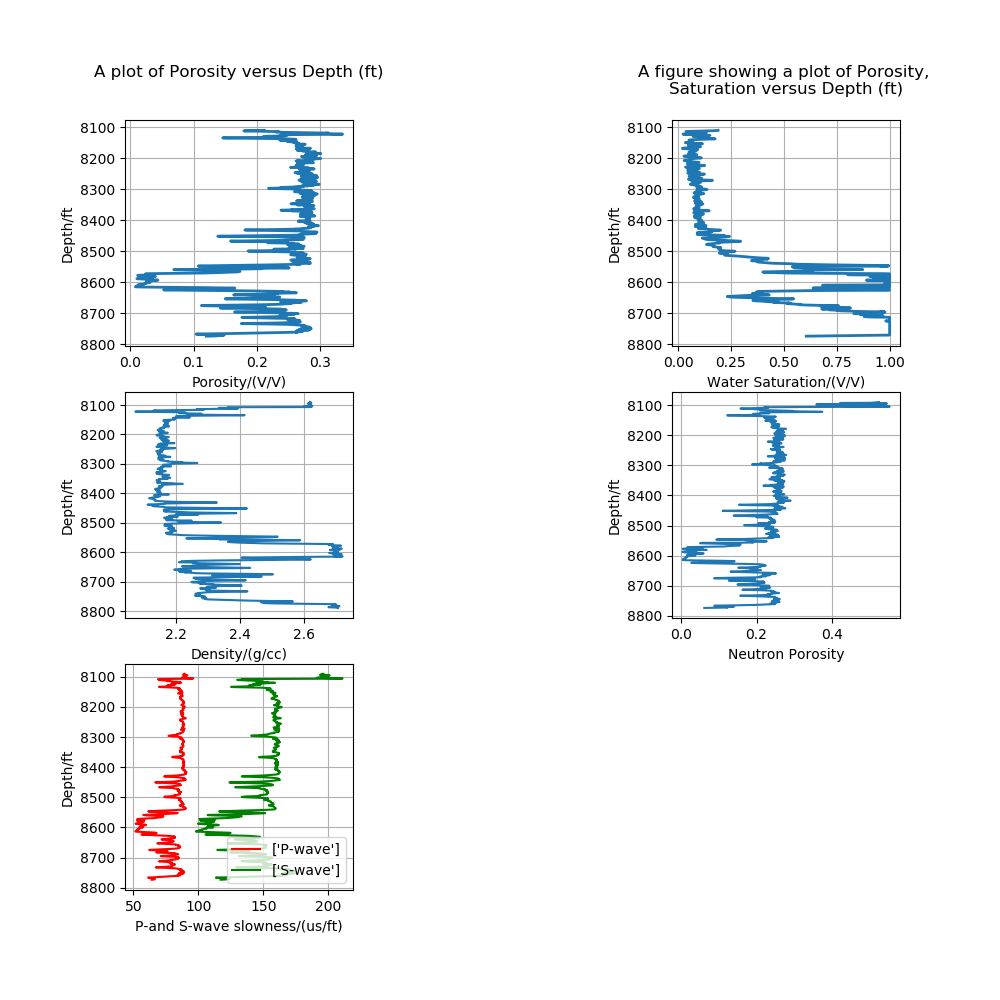

In [57]:
%matplotlib notebook
figure(figsize=(10,10))

subplot(3,3,1)
plot(las['PHIE'],las['DEPTH'], LineWidth=2)
gca().invert_yaxis()
xlabel('Porosity/(V/V)')
ylabel('Depth/ft')
title('A plot of Porosity versus Depth (ft)\n\n')
grid()

subplot(3,3,3)
plot(las['SW'],las['DEPTH'], LineWidth=2)
gca().invert_yaxis()
xlabel('Water Saturation/(V/V)')
ylabel('Depth/ft')
title('\nA figure showing a plot of Porosity, \nSaturation versus Depth (ft)\n')
grid()

subplot(3,3,4)
plot((las['RHOBCORRFINAL'])[16000:],(las['DEPTH'])[16000:])
gca().invert_yaxis()
xlabel('Density/(g/cc)')
ylabel('Depth/ft')
grid()

subplot(3,3,6)
plot(las['NPHI'][16000:],las['DEPTH'][16000:])
gca().invert_yaxis()
xlabel('Neutron Porosity')
ylabel('Depth/ft')
grid()

subplot(3,3,7)
plot(las['DTCORRFINAL'][16000:],las['DEPTH'][16000:], 'r', las['DTSCORRFINAL'][16000:],las['DEPTH'][16000:],'g')
gca().invert_yaxis()
legend([['P-wave'],['S-wave']], loc='best')
xlabel('P-and S-wave slowness/(us/ft)')
ylabel('Depth/ft')
grid()

<IPython.core.display.Javascript object>


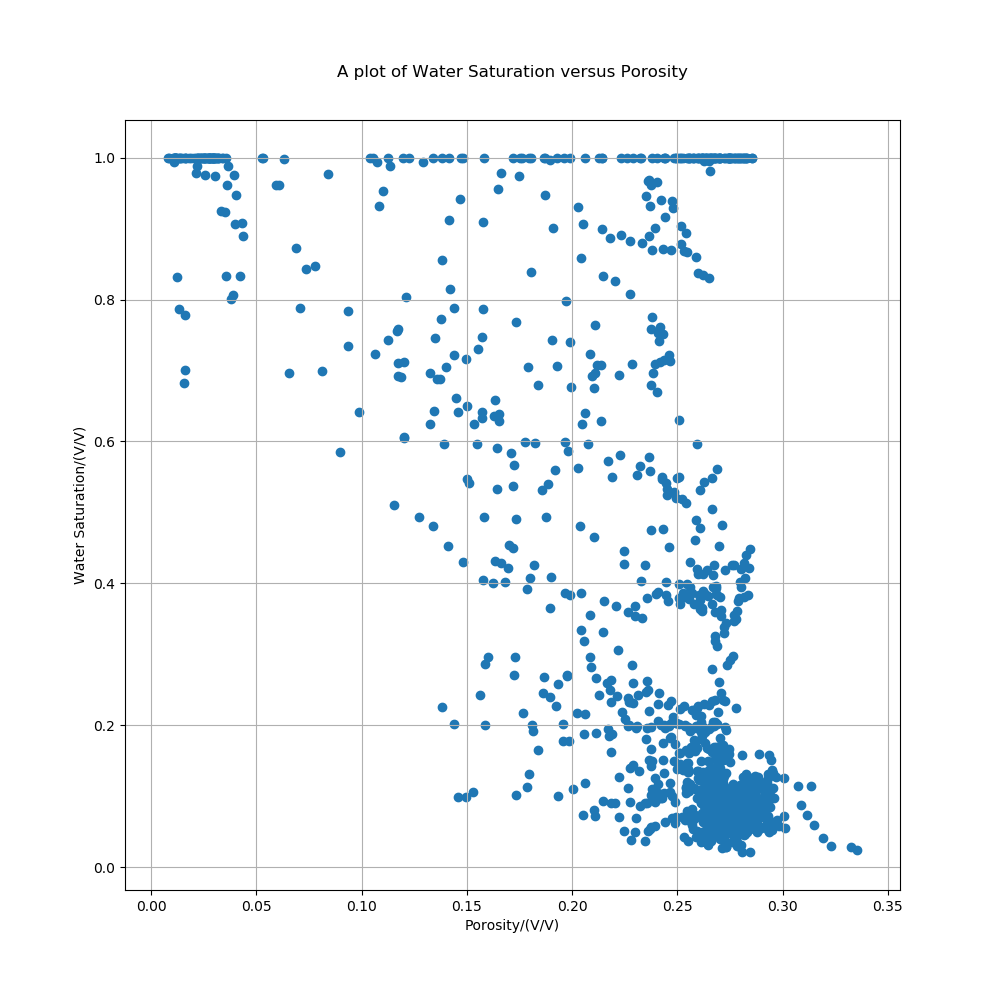

In [46]:
%matplotlib notebook
figure(figsize=(10,10))
scatter(las['PHIE'],las['SW'])
#gca().invert_yaxis()
xlabel('Porosity/(V/V)')
ylabel('Water Saturation/(V/V)')
title('A plot of Water Saturation versus Porosity\n\n')
grid()

<IPython.core.display.Javascript object>


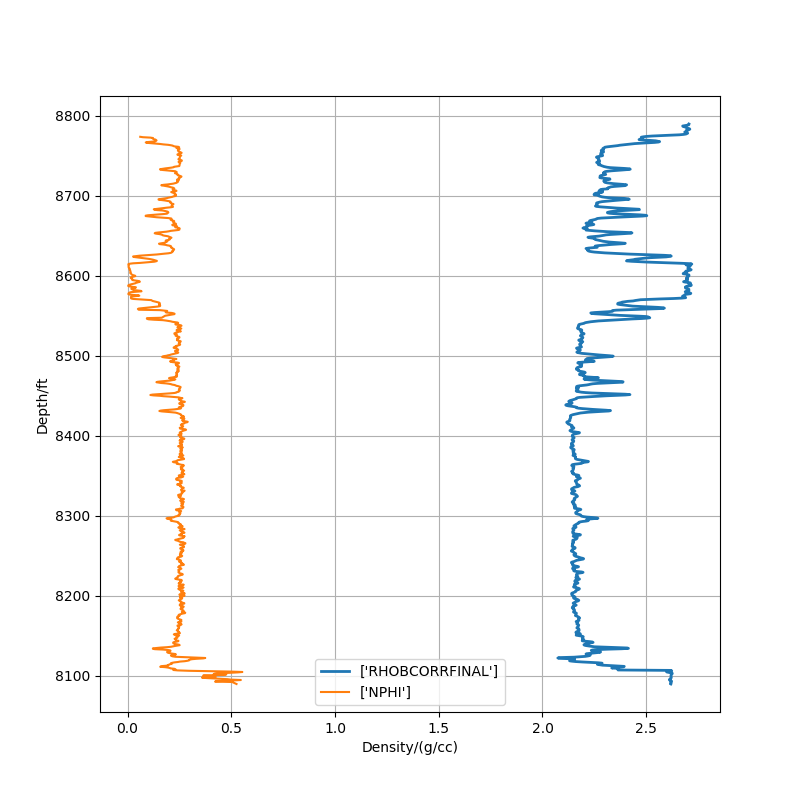

In [56]:
%matplotlib notebook
figure(figsize=(8,8))
plot((las['RHOBCORRFINAL'])[16000:],(las['DEPTH'])[16000:], LineWidth =2)
plot(las['NPHI'][16000:],las['DEPTH'][16000:])
legend([['RHOBCORRFINAL'],['NPHI']],loc='best')
xlabel('Density/(g/cc)')
ylabel('Depth/ft')
grid()

<IPython.core.display.Javascript object>


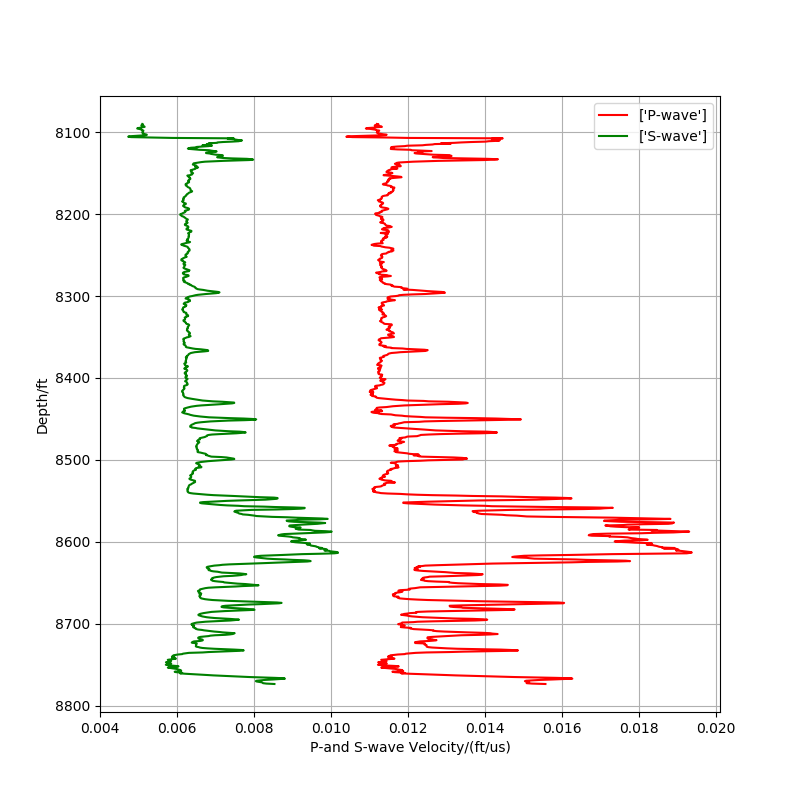

In [58]:
%matplotlib notebook
figure(figsize=(8,8))
#scatter(las['DTCORRFINAL'],las['DEPTH'], 'r', las['DTSCORRFINAL'],las['DEPTH'],'g')

Pwave = 1/las['DTCORRFINAL'][16000:]
Swave = 1/las['DTSCORRFINAL'][16000:]
depth = las['DEPTH'][16000:]

plot(Pwave,depth, 'r', Swave,depth,'g')
gca().invert_yaxis()
legend([['P-wave'],['S-wave']], loc='best')
xlabel('P-and S-wave Velocity/(ft/us)')
ylabel('Depth/ft')
grid()

<IPython.core.display.Javascript object>


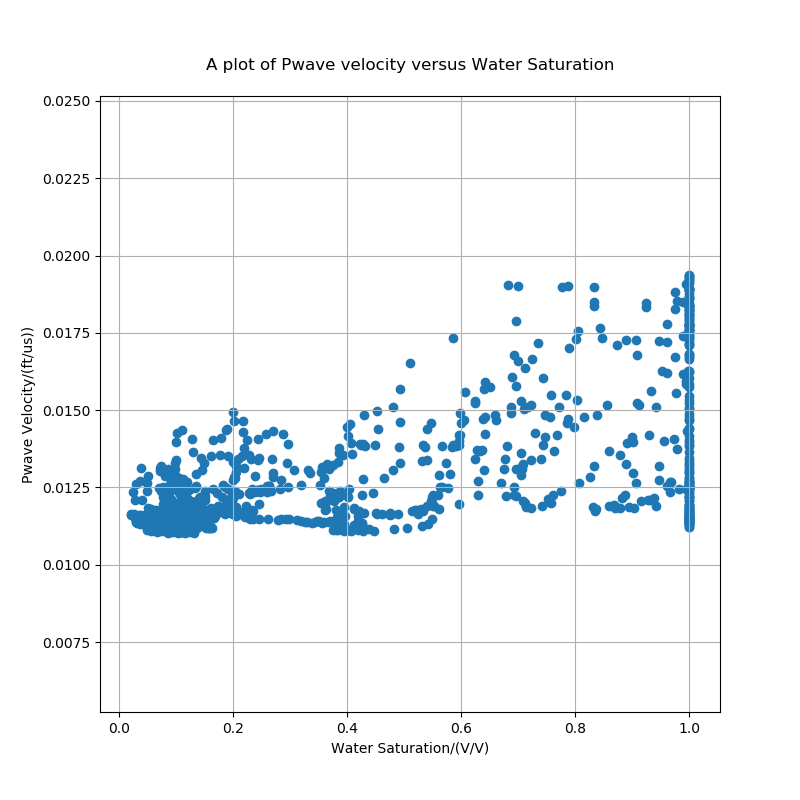

Text(0.5,1,'A plot of Pwave velocity versus Water Saturation\n')

In [65]:
%matplotlib notebook
figure(figsize=(8,8))

wSat = las['SW'][16000:]
scatter(wSat,Pwave)
grid()
xlabel('Water Saturation/(V/V)')
ylabel('Pwave Velocity/(ft/us))')
title('A plot of Pwave velocity versus Water Saturation\n')


<IPython.core.display.Javascript object>


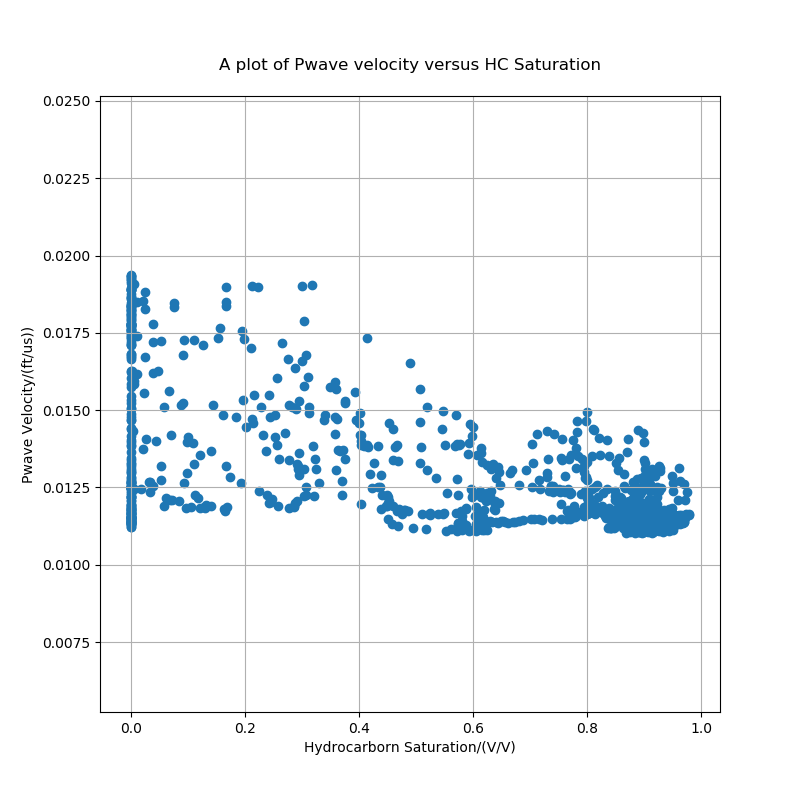

Text(0.5,1,'A plot of Pwave velocity versus HC Saturation\n')

In [66]:
%matplotlib notebook
figure(figsize=(8,8))

HcSat = 1-(las['SW'][16000:])
scatter(HcSat,Pwave)
grid()
xlabel('Hydrocarborn Saturation/(V/V)')
ylabel('Pwave Velocity/(ft/us))')
title('A plot of Pwave velocity versus HC Saturation\n')  #HC is hydrocarborn saturation

<IPython.core.display.Javascript object>


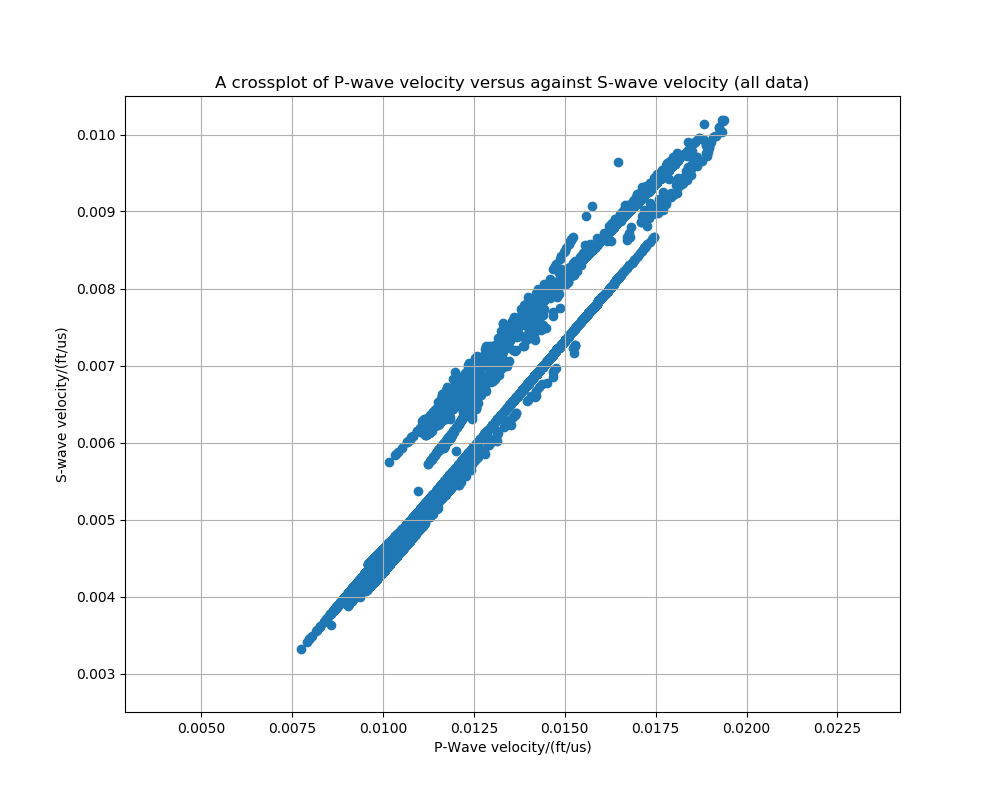

In [88]:
#Lets now crossplot the P-wave velocity against S-wave velocity to perform fluid separation of brine and hydrocarbons
#ploting all data
%matplotlib notebook
figure(figsize=(10,8))

Pwaveal = 1/las['DTCORRFINAL']
Swaveal = 1/las['DTSCORRFINAL']
scatter(Pwaveal,Swaveal)
xlabel('P-Wave velocity/(ft/us)')
ylabel('S-wave velocity/(ft/us)')
ylim([0.0025, 0.0105])
title('A crossplot of P-wave velocity versus against S-wave velocity (all data)')
grid()


<IPython.core.display.Javascript object>


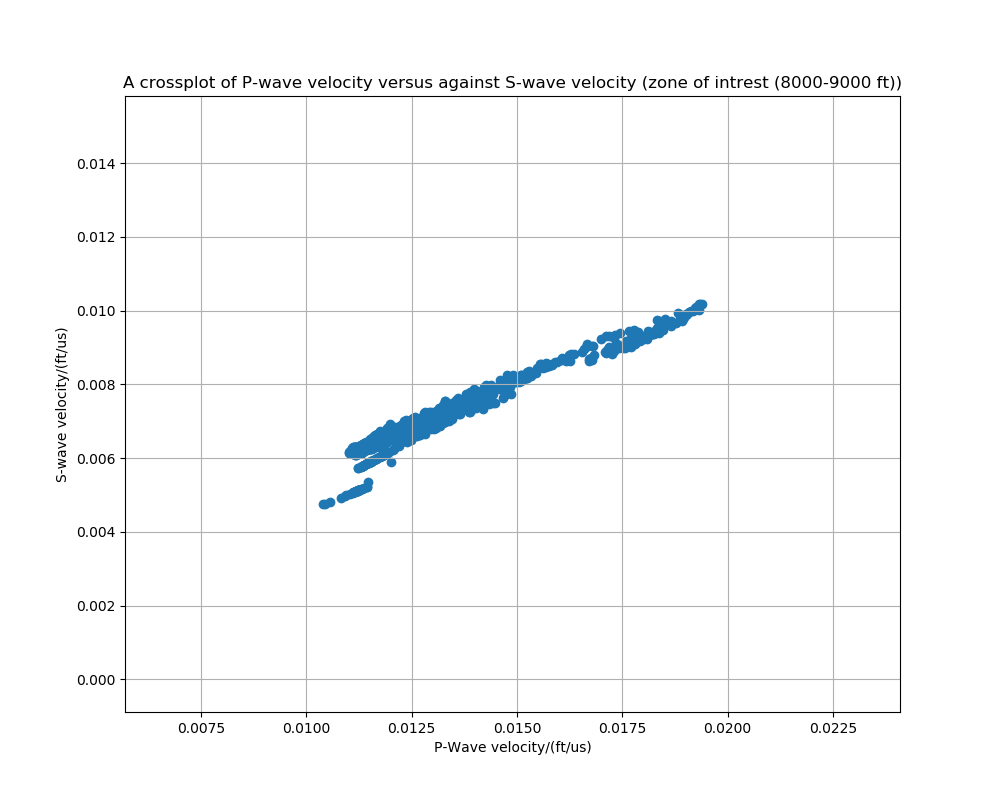

In [89]:
%matplotlib notebook
figure(figsize=(10,8))

Pwave = 1/las['DTCORRFINAL'][16000:]
Swave = 1/las['DTSCORRFINAL'][16000:]
scatter(Pwave,Swave)
xlabel('P-Wave velocity/(ft/us)')
ylabel('S-wave velocity/(ft/us)')
title('A crossplot of P-wave velocity versus against S-wave velocity (zone of intrest (8000-9000 ft))')
grid()

<IPython.core.display.Javascript object>


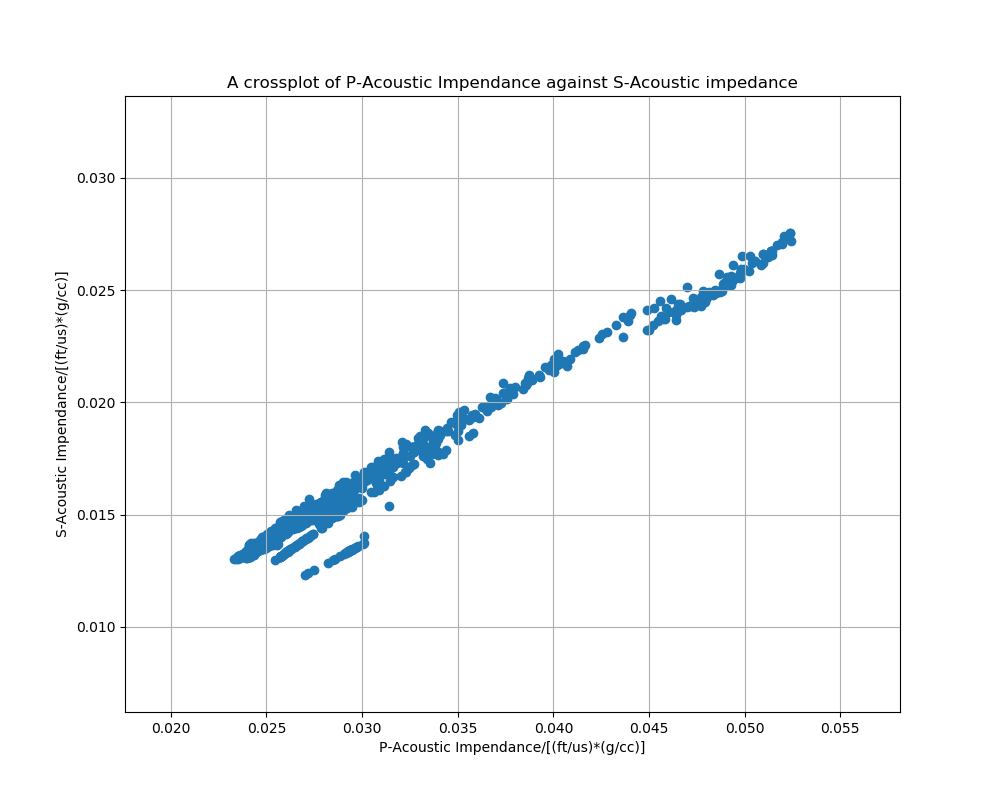

In [87]:
#Lets now crossplot the P-acoustic impedance against the vpvs velocity ratio
%matplotlib notebook
figure(figsize=(10,8))

rho =las['RHOBCORRFINAL'][16000:]
Pwave = 1/las['DTCORRFINAL'][16000:]
Swave = 1/las['DTSCORRFINAL'][16000:]
AI = rho*Pwave
SAI = rho*Swave

scatter(AI,SAI)
xlabel('P-Acoustic Impendance/[(ft/us)*(g/cc)]')
ylabel('S-Acoustic Impendance/[(ft/us)*(g/cc)]')
title('A crossplot of P-Acoustic Impendance against S-Acoustic impedance')
grid()

<IPython.core.display.Javascript object>


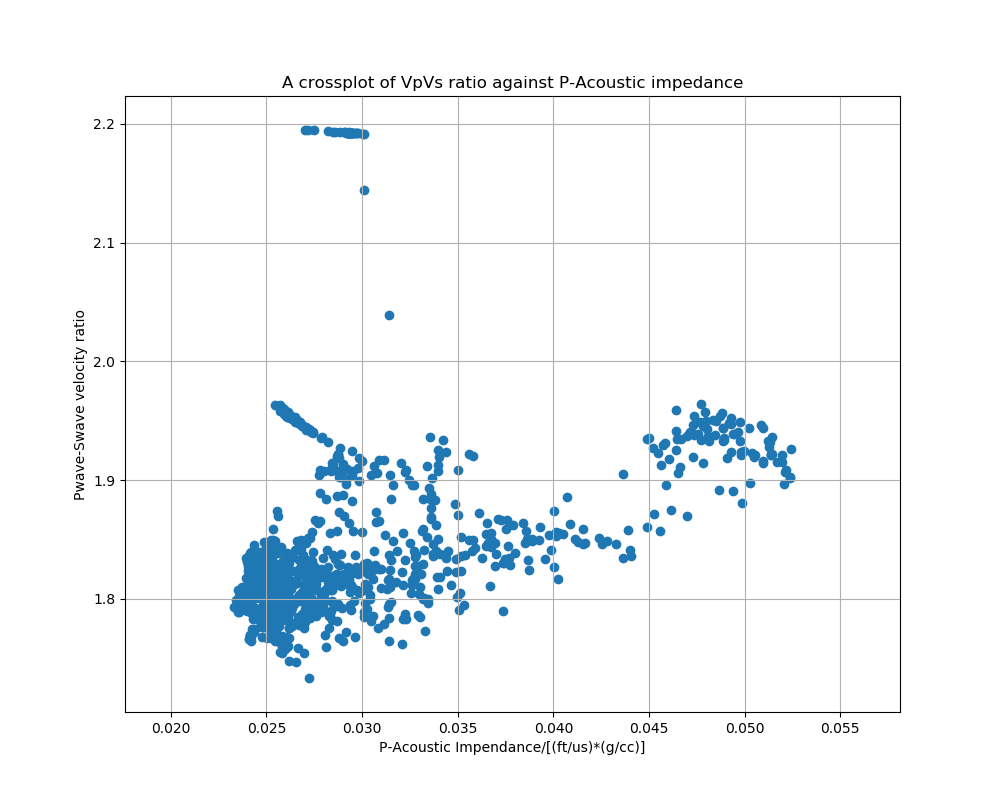

In [95]:
#Lets now crossplot the P-acoustic impedance against the vpvs velocity ratio
%matplotlib notebook
figure(figsize=(10,8))

rho =las['RHOBCORRFINAL'][16000:]
Pwave = 1/las['DTCORRFINAL'][16000:]
Swave = 1/las['DTSCORRFINAL'][16000:]

AI = rho*Pwave
VpVs = Pwave/Swave

scatter(AI,VpVs)
xlabel('P-Acoustic Impendance/[(ft/us)*(g/cc)]')
ylabel('Pwave-Swave velocity ratio')
title('A crossplot of VpVs ratio against P-Acoustic impedance')
grid()

<IPython.core.display.Javascript object>


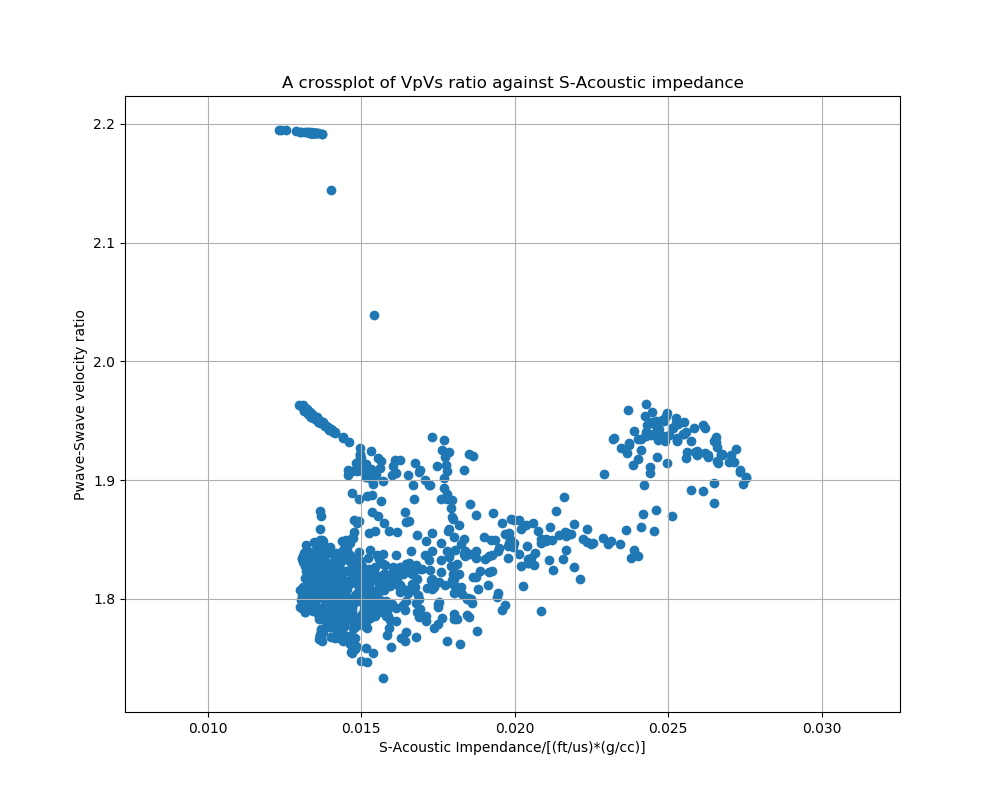

In [90]:
#Lets now crossplot the P-acoustic impedance against the vpvs velocity ratio
%matplotlib notebook
figure(figsize=(10,8))

rho =las['RHOBCORRFINAL'][16000:]
Pwave = 1/las['DTCORRFINAL'][16000:]
Swave = 1/las['DTSCORRFINAL'][16000:]

SAI = rho*Swave
VpVs = Pwave/Swave

scatter(SAI,VpVs)
xlabel('S-Acoustic Impendance/[(ft/us)*(g/cc)]')
ylabel('Pwave-Swave velocity ratio')
title('A crossplot of VpVs ratio against S-Acoustic impedance')
grid()